In [10]:
import pandas as pd


df= pd.read_csv('Housing.csv')
df.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [11]:
df.describe()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,273.500000,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,157.760895,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,1.000000,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,137.250000,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,273.500000,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,409.750000,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,546.000000,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [12]:
df.shape

(546, 13)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  546 non-null    int64  
 1   price       546 non-null    float64
 2   lotsize     546 non-null    int64  
 3   bedrooms    546 non-null    int64  
 4   bathrms     546 non-null    int64  
 5   stories     546 non-null    int64  
 6   driveway    546 non-null    object 
 7   recroom     546 non-null    object 
 8   fullbase    546 non-null    object 
 9   gashw       546 non-null    object 
 10  airco       546 non-null    object 
 11  garagepl    546 non-null    int64  
 12  prefarea    546 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 55.6+ KB


In [14]:
## checking for missing  values
df.isnull().sum()

Unnamed: 0    0
price         0
lotsize       0
bedrooms      0
bathrms       0
stories       0
driveway      0
recroom       0
fullbase      0
gashw         0
airco         0
garagepl      0
prefarea      0
dtype: int64

In [15]:
del df['Unnamed: 0']

In [16]:
## removing the duplicate values
dup=df[df.duplicated()]
df=df.drop(dup.index)
df.shape

(545, 12)

# removing the outliers

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

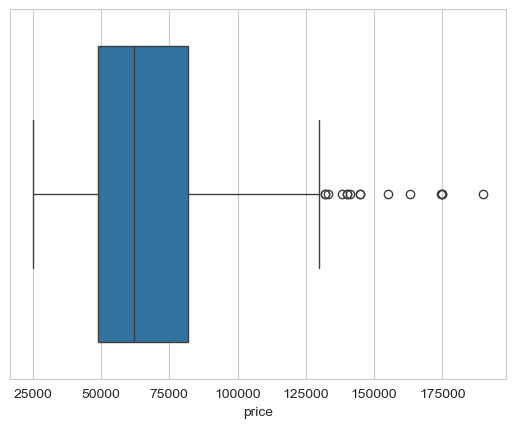

In [18]:
sns.boxplot(x='price',data=df)
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 545 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     545 non-null    float64
 1   lotsize   545 non-null    int64  
 2   bedrooms  545 non-null    int64  
 3   bathrms   545 non-null    int64  
 4   stories   545 non-null    int64  
 5   driveway  545 non-null    object 
 6   recroom   545 non-null    object 
 7   fullbase  545 non-null    object 
 8   gashw     545 non-null    object 
 9   airco     545 non-null    object 
 10  garagepl  545 non-null    int64  
 11  prefarea  545 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 55.4+ KB


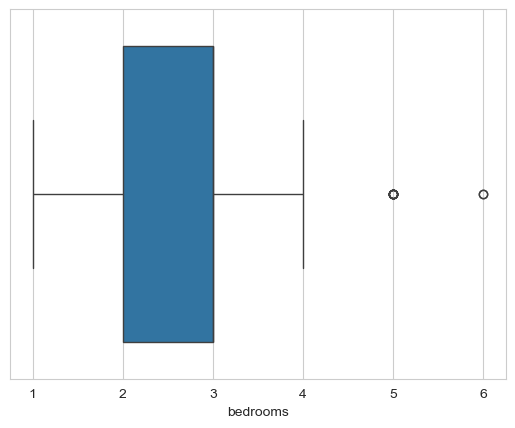

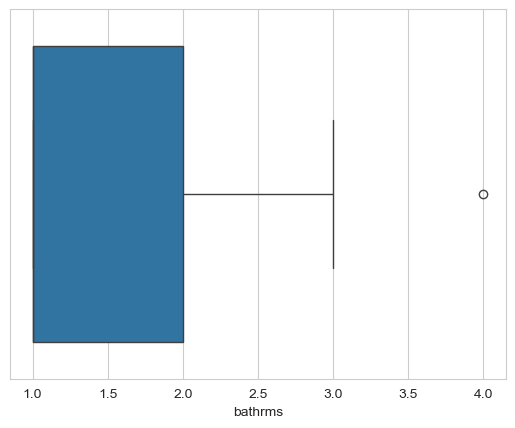

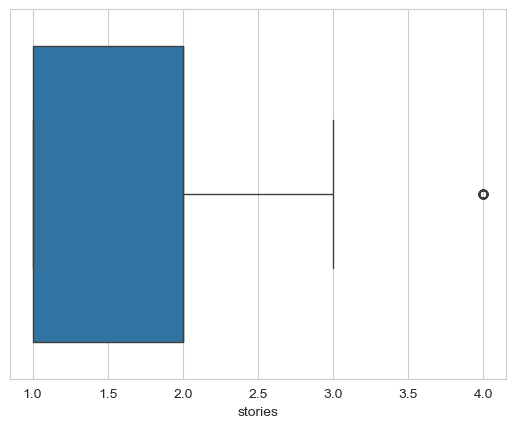

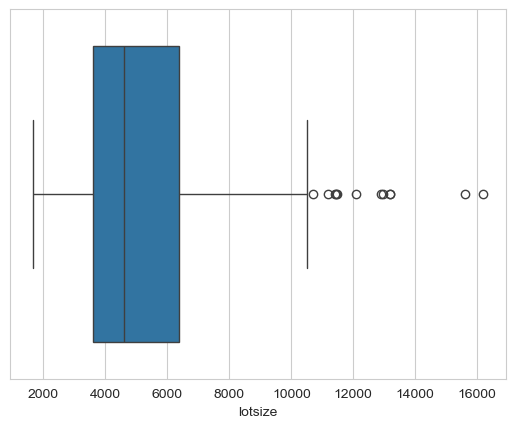

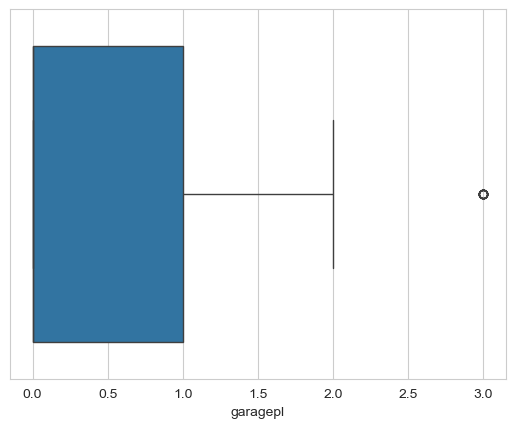

In [20]:
sns.boxplot(x='bedrooms',data=df)
plt.show()
sns.boxplot(x='bathrms',data=df)
plt.show()
sns.boxplot(x='stories',data=df)
plt.show()
sns.boxplot(x='lotsize',data=df)
plt.show()
sns.boxplot(x='garagepl',data=df)
plt.show()

# removing outliers

In [21]:
numeric_cols=['price','bedrooms','bathrms','stories','lotsize','garagepl']
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
outliers = df[((df[numeric_cols] < lower) | (df[numeric_cols] > upper)).any(axis=1)]
df = df.drop(outliers.index)

In [22]:
cat_cols = ["driveway", "recroom", "fullbase", "gashw","airco","prefarea"]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for cat_col in cat_cols:
    df[cat_col] = le.fit_transform(df[cat_col])

In [23]:
df

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,1,0,1,0,0,1,0
1,38500.0,4000,2,1,1,1,0,0,0,0,0,0
2,49500.0,3060,3,1,1,1,0,0,0,0,0,0
3,60500.0,6650,3,1,2,1,1,0,0,0,0,0
4,61000.0,6360,2,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
537,83000.0,4800,3,1,3,1,0,0,0,1,0,0
538,84000.0,6500,3,2,3,1,0,0,0,1,0,0
539,85000.0,7320,4,2,2,1,0,0,0,0,0,0
544,105000.0,6000,3,2,2,1,1,0,0,1,1,0


# Feature Scaling -> variables not in the range we need to do feature scaling (larger variables )

In [24]:
scaling = ["price", "lotsize"]
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()
for cols in scaling:
    df[cols] = mn.fit_transform(df[[cols]])

In [25]:
df.corr()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
price,1.000000,0.506596,0.337368,0.410914,0.233379,0.296586,0.328228,0.288528,0.084735,0.411579,0.328241,0.345902
lotsize,0.506596,1.000000,0.102033,0.116276,-0.098621,0.273993,0.211185,0.076846,-0.025471,0.228897,0.294469,0.228824
bedrooms,0.337368,0.102033,1.000000,0.339824,0.469634,-0.012660,0.072062,0.136135,0.013735,0.153876,0.096401,0.124427
bathrms,0.410914,0.116276,0.339824,1.000000,0.197759,0.001106,0.164462,0.183761,0.038509,0.126813,0.114545,0.059888
stories,0.233379,-0.098621,0.469634,0.197759,1.000000,0.065635,-0.014931,-0.081863,0.079549,0.140276,-0.068653,0.049443
driveway,0.296586,0.273993,-0.012660,0.001106,0.065635,1.000000,0.085953,0.079972,0.004470,0.076206,0.182620,0.204460
recroom,0.328228,0.211185,0.072062,0.164462,-0.014931,0.085953,1.000000,0.409987,-0.011650,0.112148,0.071028,0.196111
fullbase,0.288528,0.076846,0.136135,0.183761,-0.081863,0.079972,0.409987,1.000000,-0.049869,0.087458,0.071303,0.239632
gashw,0.084735,-0.025471,0.013735,0.038509,0.079549,0.004470,-0.011650,-0.049869,1.000000,-0.105284,0.071960,-0.037992
airco,0.411579,0.228897,0.153876,0.126813,0.140276,0.076206,0.112148,0.087458,-0.105284,1.000000,0.122798,0.115668


<Axes: >

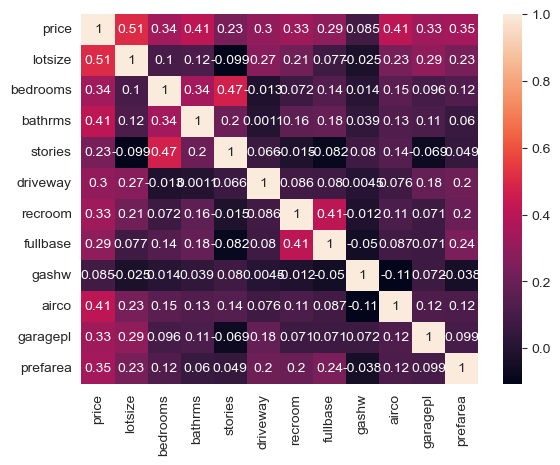

In [26]:
sns.heatmap(df.corr(), annot=True)

In [27]:
df.columns

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway',
       'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')

In [28]:
# Model Building

In [29]:
x = df.iloc[:,1:]
y = df.price
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, shuffle=True)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

# Checking Overfitting

In [35]:
print(mlr.score(x_train,y_train))
print(mlr.score(x_test,y_test))

0.5969655161831795
0.5985611407916556


In [36]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train,y_train)
print(lasso.score(x_train,y_train))
print(lasso.score(x_test,y_test))

0.0
-0.0471367614413889
